In [15]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [17]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape)

(50000, 32, 32, 3)


In [18]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [19]:
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(128, (3,3), strides=2, activation='relu')(i)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 33s 668us/sample - loss: 0.4222 - accuracy: 0.8564 - val_loss: 0.5714 - val_accuracy: 0.8179
Epoch 2/50
50000/50000 [==============================] - 28s 563us/sample - loss: 0.3524 - accuracy: 0.8789 - val_loss: 0.6713 - val_accuracy: 0.7909
Epoch 3/50
50000/50000 [==============================] - 28s 557us/sample - loss: 0.2948 - accuracy: 0.8979 - val_loss: 0.6151 - val_accuracy: 0.8182
Epoch 4/50
50000/50000 [==============================] - 27s 548us/sample - loss: 0.2488 - accuracy: 0.9140 - val_loss: 0.6987 - val_accuracy: 0.8104
Epoch 5/50
50000/50000 [==============================] - 27s 547us/sample - loss: 0.2284 - accuracy: 0.9211 - val_loss: 0.6496 - val_accuracy: 0.8171
Epoch 6/50
50000/50000 [==============================] - 29s 571us/sample - loss: 0.1873 - accuracy: 0.9360 - val_loss: 0.6779 - val_accuracy: 0.8173
Epoch 7/50
50000/50000 [====================

In [24]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 64s 41ms/step - loss: 0.5415 - accuracy: 0.8282 - val_loss: 0.5584 - val_accuracy: 0.8293
Epoch 2/50
1562/1562 [==============================] - 67s 43ms/step - loss: 0.4273 - accuracy: 0.8606 - val_loss: 0.4826 - val_accuracy: 0.8453
Epoch 3/50
1562/1562 [==============================] - 67s 43ms/step - loss: 0.4029 - accuracy: 0.8675 - val_loss: 0.4613 - val_accuracy: 0.8541
Epoch 4/50
1562/1562 [==============================] - 69s 44ms/step - loss: 0.3751 - accuracy: 0.8764 - val_loss: 0.4677 - val_accuracy: 0.8527
Epoch 5/50
1562/1562 [==============================] - 69s 44ms/step - loss: 0.3585 - accuracy: 0.8798 - val_loss: 0.4613 - val_accuracy: 0.8500
Epoch 6/50
1562/1562 [==============================] - 76s 48ms/step - loss: 0.3460 - accuracy: 0.8852 - val_loss: 0.439

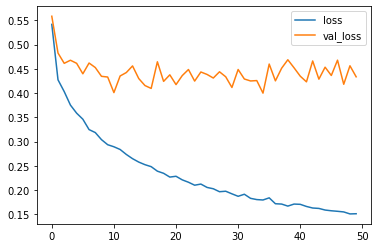

In [25]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

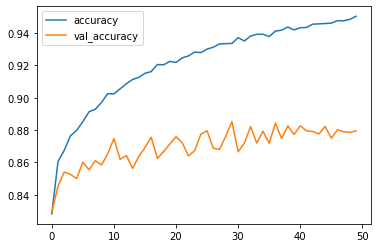

In [26]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()